In [ ]:
!pip install wordcloud

In [188]:
# Built-in package
import re
from string import punctuation

# Plotting package
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK package
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import en_core_web_sm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Scikit-Learn package
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Mathematical operation package
import pandas as pd
import numpy as np

# twitter scrapper
import snscrape.modules.twitter as sntwitter


In [164]:
df = pd.read_csv('chatgpt_tweet.csv')
df.head()

,Datetime,Tweet Id,Text,Username
0,2023-02-27 23:59:59+00:00,1630357108662075402,@themarcusramsey Learn chatGPT guys for everyt...,MeEmpratoor
1,2023-02-27 23:59:57+00:00,1630357098532839424,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,AznburInnit
2,2023-02-27 23:59:46+00:00,1630357051615617025,#モーニングショー\n#チャットGPT\n#ChatGPT\nこの直木賞作家のおっさんもこれ...,muko20594899
3,2023-02-27 23:59:43+00:00,1630357039833812993,#chatGPT \nすごい流行ってるね。\nもう、インテルあたりは\n設計に機械学習使って...,still_your_turn
4,2023-02-27 23:59:41+00:00,1630357031881445378,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,camelemonglass


In [165]:
test_link = 'https://test.com'
re.sub('https://\S+|http://\S+', '', test_link)

''

In [166]:
test_text = 'An Alternative to ChatGPT!&lt;/h1&gt;&lt;p&gt;&lt;br&gt;&lt;/p&gt;&lt;p&gt;&lt;'
pattern = '&(amp|lt|gt);?'
pattern_replace_map = {
    '&lt;': '<',
    '&gt;': '>',
    '&amp;': 'and'
}

# Define a function to replace the matches with their corresponding values
def replace_match(match):
    return pattern_replace_map[match.group(0)]

# Use re.sub() to replace the substrings with their corresponding values
new_text = re.sub(pattern, replace_match, test_text)

print(new_text)

An Alternative to ChatGPT!</h1><p><br></p><p><


In [167]:
test_text = "Some sample text with date 2023-02-28 and time 02:28:07 in it."
re.sub(r"\b\d{4}-\d{2}-\d{2}\b|\b\d{2}:\d{2}:\d{2}\b", "", test_text)

'Some sample text with date  and time  in it.'

In [168]:
def tweet_process(tweet_text: str) -> str:
    """
        Processes the tweet text to remove any non-ascii characters.
        
        ### Parameters:
        text: str
            Tweet text

        ### Returns:
        str:
            A string only containing ascii characters 
    """
    tweet_text = re.sub('https://\S+|http://\S+', '', tweet_text) # Remove whole links
    tweet_text = re.sub(pattern, replace_match, tweet_text) # Converting html tags references
    # Remove new lines, mentions, hastags, and multiple spaces
    tweet_text = re.sub('[\r\n]+', ' ', tweet_text)
    tweet_text = re.sub(r'@\w+', '', tweet_text)
    tweet_text = re.sub(r'#\w+', '', tweet_text)
    tweet_text = re.sub('\s+', ' ', tweet_text)
    tweet_text = re.sub(r"\b\d{4}-\d{2}-\d{2}\b|\b\d{2}:\d{2}:\d{2}\b", "", tweet_text) # Remove datetime string
    return tweet_text.lower()


In [169]:
df['processed_tweet'] = df['Text'].apply(tweet_process)

In [170]:
df.head()

,Datetime,Tweet Id,Text,Username,processed_tweet
0,2023-02-27 23:59:59+00:00,1630357108662075402,@themarcusramsey Learn chatGPT guys for everyt...,MeEmpratoor,learn chatgpt guys for everything.
1,2023-02-27 23:59:57+00:00,1630357098532839424,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,AznburInnit,you really want chatgpt to rule the world?
2,2023-02-27 23:59:46+00:00,1630357051615617025,#モーニングショー\n#チャットGPT\n#ChatGPT\nこの直木賞作家のおっさんもこれ...,muko20594899,この直木賞作家のおっさんもこれを機にこっそり使うんちゃう いやもう使ってるかも 知らんけど
3,2023-02-27 23:59:43+00:00,1630357039833812993,#chatGPT \nすごい流行ってるね。\nもう、インテルあたりは\n設計に機械学習使って...,still_your_turn,すごい流行ってるね。 もう、インテルあたりは 設計に機械学習使ってるよね。 最適化は進むな...
4,2023-02-27 23:59:41+00:00,1630357031881445378,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,camelemonglass,以前、chatgptで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...


In [171]:
df.sample(n=20)

,Datetime,Tweet Id,Text,Username,processed_tweet
5297,2023-02-27 20:18:13+00:00,1630301296698834945,"Tomorrow, we have the last day of our February...",ELT_CATION,"tomorrow, we have the last day of our february..."
2212,2023-02-27 22:29:27+00:00,1630334324913446915,"@gpt_chatgpt \n\nI'm sorry, but I can't provid...",gpt_chatgpt,"i'm sorry, but i can't provide a response tha..."
1114,2023-02-27 23:13:41+00:00,1630345456113819649,"@florinpop1705 And then, imaging explaining th...",romaindewolff,"and then, imaging explaining them what is cha..."
3206,2023-02-27 21:52:29+00:00,1630325019548041218,Put this scenario into ChatGPT. What a boring ...,themsley,put this scenario into chatgpt. what a boring ...
3122,2023-02-27 21:57:05+00:00,1630326176399998977,Microsoft Wants to Use ChatGPT to Control Robo...,ric_santamaria,microsoft wants to use chatgpt to control robo...
3667,2023-02-27 21:30:57+00:00,1630319602709176320,I have a knowledge base of articles.. easiest ...,kendallmhines,i have a knowledge base of articles.. easiest ...
5738,2023-02-27 20:00:25+00:00,1630296816959848449,Alguém sabe me dizer se o ChatGPT declara impo...,viniciusilveira,alguém sabe me dizer se o chatgpt declara impo...
4995,2023-02-27 20:32:24+00:00,1630304867683037186,ChatGPT is a publicly available AI tool with m...,DAnderson24609,chatgpt is a publicly available ai tool with m...
3524,2023-02-27 21:37:49+00:00,1630321328682315777,Help! My Business Wants to Start Using ChatGPT...,JDSupra,help! my business wants to start using chatgpt!
685,2023-02-27 23:31:01+00:00,1630349816541716481,@lilyraynyc @jenstar Would you be willing to t...,andywalters,would you be willing to try out lexii combine...


In [172]:
df.drop(['Datetime', 'Tweet Id', 'Username'], axis=1, inplace=True)
df

,Text,processed_tweet
0,@themarcusramsey Learn chatGPT guys for everyt...,learn chatgpt guys for everything.
1,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,you really want chatgpt to rule the world?
2,#モーニングショー\n#チャットGPT\n#ChatGPT\nこの直木賞作家のおっさんもこれ...,この直木賞作家のおっさんもこれを機にこっそり使うんちゃう いやもう使ってるかも 知らんけど
3,#chatGPT \nすごい流行ってるね。\nもう、インテルあたりは\n設計に機械学習使って...,すごい流行ってるね。 もう、インテルあたりは 設計に機械学習使ってるよね。 最適化は進むな...
4,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,以前、chatgptで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...
...,...,...
5996,"Dr. @emollick, an Associate Professor at @Whar...","dr. , an associate professor at of the univers..."
5997,@alexxprs La maîtrise d'Excel c'est de la logi...,la maîtrise d'excel c'est de la logique et qu...
5998,@GnuDoyng 有没有试试ChatGPT评估一下他的《移民基础》回答的如何,有没有试试chatgpt评估一下他的《移民基础》回答的如何
5999,2023-02-28 03:47:55 \n👌😀😄😝😌 \nBy different bab...,👌😀😄😝😌 by different baby world necessary best...


In [173]:
pattern = r'[^\x00-\x7F]+'
def keep_english_words(text: str) -> str:
    """
        Keep only english words in the text.

        ### Parameters:
        text: str
            Tweet text

        ### Returns:
        str: 
            A string only containing english words 
    """
    return re.sub(pattern, '', text)


In [174]:
df['processed_tweet'] = df['processed_tweet'].apply(keep_english_words)
df.head()

,Text,processed_tweet
0,@themarcusramsey Learn chatGPT guys for everyt...,learn chatgpt guys for everything.
1,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,you really want chatgpt to rule the world?
2,#モーニングショー\n#チャットGPT\n#ChatGPT\nこの直木賞作家のおっさんもこれ...,
3,#chatGPT \nすごい流行ってるね。\nもう、インテルあたりは\n設計に機械学習使って...,
4,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,chatgpt


In [175]:
df.isnull().sum()

Text               0
processed_tweet    0
dtype: int64

In [176]:
nlp = en_core_web_sm.load()

In [177]:
df['processed_tweet'].sample(n=15)

626     if you have an ai saas and want to go viral on...
514                                    chatgptbard lambda
1377    5 ways chatgpt will change the future of b2b c...
2253    estos son los bancos que han restringido a sus...
3273    chatgpt sert dj  automatiser le travail des em...
3519     jag frstr inte det hr riktigt. vad du menar r...
1348    tiembla google. nace una nueva amenaza contra ...
3162                                    smartychatgpt<{}>
1224    deus virou moda os boboes do linkedin tirar pr...
5330    setelah chatgpt, sekarang , saya akan menjadik...
4354    bonus** do you want to use chatgpt like a pro?...
4190    ok i've got my starting point now... this is w...
1270                          wenn chatgpt ein mensch wre
5703    alors que la plupart des coles interdisent l'u...
3156    google sheets plugin that uses gpt-3 to answer...
Name: processed_tweet, dtype: object

In [178]:
def get_n_gram(corpus: pd.Series, n: int=None, range: tuple=(2, 2)) -> list:
    """
        Returns n-grams from a corpus.

        ### Parameters
        corpus: pd.Series
            A dataframe series containing corpus.
        n: int 
            The number of n-grams to return.
        range: tuple
            The range of n-grams to return.

        ### Returns
        list: 
            List of top occurring n-grams
    """
    count_vector = CountVectorizer(ngram_range=range, stop_words='english').fit(corpus)
    bag_of_words =  count_vector.fit_transform(corpus)
    bg_sum = bag_of_words.sum(axis=0)
    words_freq = [(word, bg_sum[0, idx]) for word, idx in count_vector.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


In [179]:
bi_common_words = get_n_gram(df['processed_tweet'], 15)

In [180]:
bi_common_words

[('chat gpt', 596),
 ('character limit', 259),
 ('tweet character', 190),
 ('response exceeds', 188),
 ('exceeds tweet', 165),
 ('using chatgpt', 93),
 ('use chatgpt', 77),
 ('chatgpt write', 67),
 ('asked chatgpt', 65),
 ('chatgpt ai', 62),
 ('like chatgpt', 59),
 ('inteligencia artificial', 54),
 ('ai chatbot', 53),
 ('chatbot powered', 49),
 ('ask chatgpt', 47)]

In [181]:
def visualization_n_gram(common_words: list, title: str) -> None:
    """
        Visualization of n-grams
        
        ### Parameters
        common_words: list
            list of common n_gram words 
            >>> [('chat gpt', 596),
                    ('character limit', 259),
                ]
        title: str
            Title of graph
        ### Return
        None
    """
    # Create a dataframe 
    vis_df = pd.DataFrame(common_words, columns=['Tweet', 'Count'])
    vis_df.plot(x='Tweet', y='Count', kind='bar', title=title)

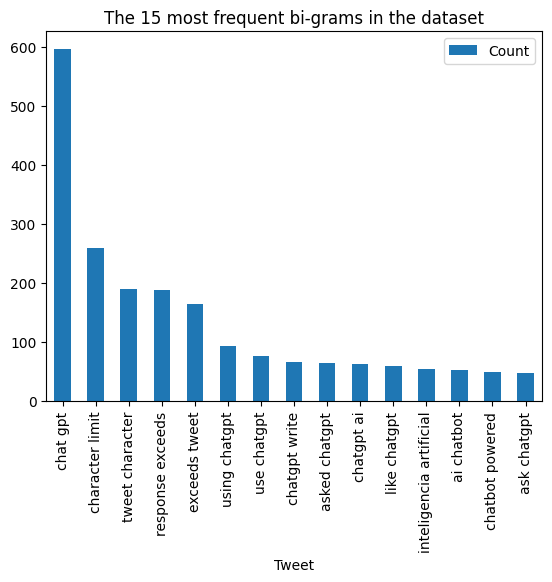

In [182]:
visualization_n_gram(common_words=bi_common_words, title='The 15 most frequent bi-grams in the dataset')

In [183]:
tri_common_words = get_n_gram(df['processed_tweet'], 15, range=(3,3))
tri_common_words

[('tweet character limit', 190),
 ('response exceeds tweet', 165),
 ('exceeds tweet character', 165),
 ('ai chatbot powered', 40),
 ('chatbot powered chatgpt', 37),
 ('character limit tweet', 37),
 ('exceeds character limit', 27),
 ('releasing ai chatbot', 25),
 ('snapchat releasing ai', 24),
 ('response exceeds character', 22),
 ('basado en chatgpt', 19),
 ('chatbot inteligencia artificial', 18),
 ('el chat gpt', 18),
 ('asked chatgpt write', 18),
 ('sorry response exceeds', 18)]

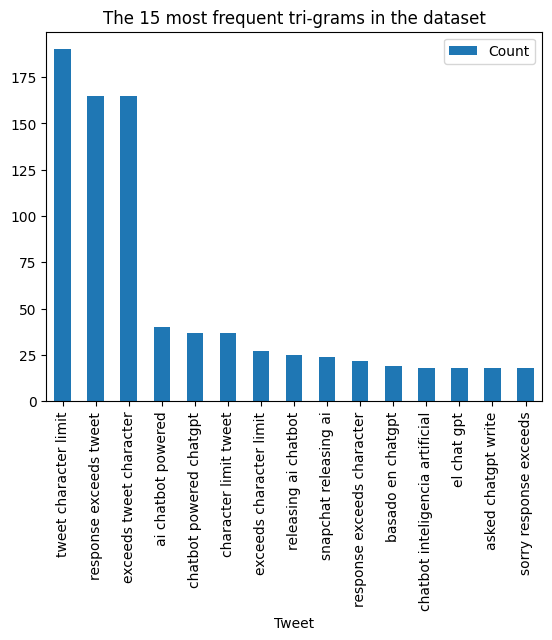

In [184]:
visualization_n_gram(tri_common_words, title='The 15 most frequent tri-grams in the dataset')

In [185]:
def remove_punct(text: str) -> str:
    """
        Remove punctuation from a string.

        ### Parameters 
        text: str 
            The string to remove punctuation from.

        ### Returns
        text: str
            The string with punctuation removed.
    """
    text = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',text)
    return text

In [186]:
df['remove_punct'] = df['processed_tweet'].apply(remove_punct)

In [189]:
stopwords = set(stopwords.words("english"))
df['remove_punct'] = df['remove_punct'].apply(word_tokenize)
df.head()

,Text,processed_tweet,remove_punct
0,@themarcusramsey Learn chatGPT guys for everyt...,learn chatgpt guys for everything.,"[learn, chatgpt, guys, for, everything]"
1,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,you really want chatgpt to rule the world?,"[you, really, want, chatgpt, to, rule, the, wo..."
2,#モーニングショー\n#チャットGPT\n#ChatGPT\nこの直木賞作家のおっさんもこれ...,,[]
3,#chatGPT \nすごい流行ってるね。\nもう、インテルあたりは\n設計に機械学習使って...,,[]
4,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,chatgpt,[chatgpt]


In [190]:
def remove_stopwords(text: list) -> list:
    """
        Removes stopwords from text.

        ### Parameters
        text: str 
            list of words
        
        ### Returns
        list:
            list of words without stopwords
    """
    text_list = [word for word in text if word.lower() not in stopwords]
    return text_list

In [191]:

df['remove_stopwords'] = df['remove_punct'].apply(remove_stopwords)
df

,Text,processed_tweet,remove_punct,remove_stopwords
0,@themarcusramsey Learn chatGPT guys for everyt...,learn chatgpt guys for everything.,"[learn, chatgpt, guys, for, everything]","[learn, chatgpt, guys, everything]"
1,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,you really want chatgpt to rule the world?,"[you, really, want, chatgpt, to, rule, the, wo...","[really, want, chatgpt, rule, world]"
2,#モーニングショー\n#チャットGPT\n#ChatGPT\nこの直木賞作家のおっさんもこれ...,,[],[]
3,#chatGPT \nすごい流行ってるね。\nもう、インテルあたりは\n設計に機械学習使って...,,[],[]
4,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,chatgpt,[chatgpt],[chatgpt]
...,...,...,...,...
5996,"Dr. @emollick, an Associate Professor at @Whar...","dr. , an associate professor at of the univers...","[dr, an, associate, professor, at, of, the, un...","[dr, associate, professor, university, joins, ..."
5997,@alexxprs La maîtrise d'Excel c'est de la logi...,la matrise d'excel c'est de la logique et que...,"[la, matrise, dexcel, cest, de, la, logique, e...","[la, matrise, dexcel, cest, de, la, logique, e..."
5998,@GnuDoyng 有没有试试ChatGPT评估一下他的《移民基础》回答的如何,chatgpt,[chatgpt],[chatgpt]
5999,2023-02-28 03:47:55 \n👌😀😄😝😌 \nBy different bab...,by different baby world necessary best.,"[by, different, baby, world, necessary, best]","[different, baby, world, necessary, best]"


In [192]:
def get_pos_tag(text_list: list) -> list:
    """
        Returns a list of POS tags for the given list of words.

        ### Parameters
        text_list: list
            A list of words

        ### Returns
        list:
            A list of POS tags
    """
    return nltk.pos_tag(text_list)

In [193]:
df['pos_tag'] = df['remove_stopwords'].apply(get_pos_tag)
df.head()

,Text,processed_tweet,remove_punct,remove_stopwords,pos_tag
0,@themarcusramsey Learn chatGPT guys for everyt...,learn chatgpt guys for everything.,"[learn, chatgpt, guys, for, everything]","[learn, chatgpt, guys, everything]","[(learn, JJ), (chatgpt, NN), (guys, NNS), (eve..."
1,@AAPAmitSharma1 @WithBedPro @UNABLEWALK4 you r...,you really want chatgpt to rule the world?,"[you, really, want, chatgpt, to, rule, the, wo...","[really, want, chatgpt, rule, world]","[(really, RB), (want, JJ), (chatgpt, NN), (rul..."
2,#モーニングショー\n#チャットGPT\n#ChatGPT\nこの直木賞作家のおっさんもこれ...,,[],[],[]
3,#chatGPT \nすごい流行ってるね。\nもう、インテルあたりは\n設計に機械学習使って...,,[],[],[]
4,以前、ChatGPTで長岡のことについて聞いてみたらなかなかの返事が来た。そしてお礼を言った...,chatgpt,[chatgpt],[chatgpt],"[(chatgpt, NN)]"


In [194]:
lemmatizer = WordNetLemmatizer()

In [195]:
def word_pos_lemmetize(text_list: list) -> list:
    """
        Return a list of words with lemma form.

        ### Parameters
        text_list: list
            A list of words.

        ### Returns
        list:
            A list of words converted to lemma form.
    """
    new_lemmetize_list = []
    for text, tag in text_list:
        text = text.lower()
        if tag.startswith('N'):
            wld = lemmatizer.lemmatize(text, pos='n')
        elif tag.startswith('V'):
            wld = lemmatizer.lemmatize(text, pos='v')
        elif tag.startswith('J'):
            wld = lemmatizer.lemmatize(text, pos='a')
        elif tag.startswith('R'):
            wld = lemmatizer.lemmatize(text, pos='r')
        else:
            wld = text
        new_lemmetize_list.append(wld)
    return new_lemmetize_list

In [196]:
df['text_lemmatizer'] = df['pos_tag'].apply(word_pos_lemmetize)

In [198]:
df.sample(n=25)

,Text,processed_tweet,remove_punct,remove_stopwords,pos_tag,text_lemmatizer
5613,Take a look to $ERO\n #RedditArmy #Stocks #d...,take a look to $ero,"[take, a, look, to, ero]","[take, look, ero]","[(take, VB), (look, NN), (ero, NN)]","[take, look, ero]"
143,おはよう大阪🌞\n\n#今日の積み上げ\n・chatGPTでリライト2個\n・AI画像の指示...,chatgpt2 ai 6 ai ab,"[chatgpt2, ai, 6, ai, ab]","[chatgpt2, ai, 6, ai, ab]","[(chatgpt2, NN), (ai, VBP), (6, CD), (ai, NN),...","[chatgpt2, ai, 6, ai, ab]"
5090,ChatGPT é daora demais kkkkkk,chatgpt daora demais kkkkkk,"[chatgpt, daora, demais, kkkkkk]","[chatgpt, daora, demais, kkkkkk]","[(chatgpt, NN), (daora, NNS), (demais, VBP), (...","[chatgpt, daora, demais, kkkkkk]"
5965,"In a new exclusive Q&amp;A, #SweetwaterSound l...","in a new exclusive qanda, looks at the pros an...","[in, a, new, exclusive, qanda, looks, at, the,...","[new, exclusive, qanda, looks, pros, cons, usi...","[(new, JJ), (exclusive, JJ), (qanda, NN), (loo...","[new, exclusive, qanda, look, pros, con, use, ..."
4535,🚀\n\n$CLCGY \n\nLike 😎 🙏\n #RedditArmy #daytr...,$clcgy like,"[clcgy, like]","[clcgy, like]","[(clcgy, NNS), (like, IN)]","[clcgy, like]"
2988,今日も朝からChatGPT使ってるけど、なんか応答時間が早くなってる気がする。てことは、昨晩...,chatgpt,[chatgpt],[chatgpt],"[(chatgpt, NN)]",[chatgpt]
935,I don't start with Google for research anymore...,i don't start with google for research anymore...,"[i, dont, start, with, google, for, research, ...","[dont, start, google, research, anymore, think...","[(dont, JJ), (start, NN), (google, NN), (resea...","[dont, start, google, research, anymore, think..."
4856,"@ErikReed Bro, that's so 2019. Everyone is usi...","bro, that's so 2019. everyone is using chatgp...","[bro, thats, so, 2019, everyone, is, using, ch...","[bro, thats, 2019, everyone, using, chatgpt, w...","[(bro, NN), (thats, NNS), (2019, CD), (everyon...","[bro, thats, 2019, everyone, use, chatgpt, wri..."
189,国内怎么注册Chat GPT，谁有详细的教程啊？谢谢了🙏,chat gpt,"[chat, gpt]","[chat, gpt]","[(chat, NNS), (gpt, VBD)]","[chat, gpt]"
3625,"""Money can't buy happiness, but it's a lot mor...","""money can't buy happiness, but it's a lot mor...","[money, cant, buy, happiness, but, its, a, lot...","[money, cant, buy, happiness, lot, comfortable...","[(money, NN), (cant, NN), (buy, VBP), (happine...","[money, cant, buy, happiness, lot, comfortable..."


In [200]:
def convert_list_to_str(text_list: list) -> str:
    """
        Convert a list of strings to a string.

        ### Parameters
        text_list: list
            A list of strings

        ### Returns
        str:
            A text of string
    """
    str_text = ''
    for i in text_list:
        str_text += i +' '
    return str_text

In [204]:
all_text = " ".join(df['text_lemmatizer'].apply(convert_list_to_str))

In [206]:
word_cloud = WordCloud(
    width=3000,
    height=3000,
    stopwords=STOPWORDS,
    mode="RGBA",
    background_color='white',
).generate(all_text)

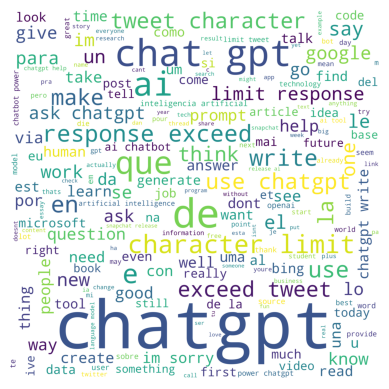

In [207]:
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [226]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))

In [227]:
X = vectorizer.fit_transform(df['text_lemmatizer'].map(lambda x: ' '.join(x)).tolist())

In [228]:
X

<6001x99904 sparse matrix of type '<class 'numpy.float64'>'
	with 156533 stored elements in Compressed Sparse Row format>

In [229]:
X.shape

(6001, 99904)

In [232]:
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

/Users/sunilthapa/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [237]:
from sklearn.cluster import KMeans

# Now, for elbow method. We'll try clustering from k=1 to k=15 and see how well the curve is displayed
x, y = [], []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_tfidf)
    x.append(k)
    y.append(kmeans.inertia_)
    
plt.plot(x, y)

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 
